In [44]:
import pandas as pd
import yfinance as yf
import datetime as datetime
import altair as alt
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import plotly.express as px

In [48]:
# to select tickers and import current data

tickers = 'MSFT'
#ticker_code = ('MSFT APPL GOOG') # to select multiple tickers
ticker = yf.Ticker(tickers)
stockinfo = ticker.info

# to view all entries in stockinfo dictionary as one line per item
# for key, value in stockinfo.items():
#     print(key, ":", value)

In [49]:
# to import current data
shortName = stockinfo['shortName']
sector = stockinfo['sector']
industry = stockinfo['industry']
country = stockinfo['country']
logo_url = stockinfo['logo_url']
floatShares = stockinfo['floatShares']
currency = stockinfo['currency']
financialCurrency = stockinfo['financialCurrency']
fullTimeEmployees = stockinfo['fullTimeEmployees']
currentPrice = stockinfo['currentPrice']
bid = stockinfo['bid']
ask = stockinfo['ask']
fiftyTwoWeekHigh = stockinfo['fiftyTwoWeekHigh']
fiftyTwoWeekLow = stockinfo['fiftyTwoWeekLow']
marketCap = stockinfo['marketCap']
totalRevenue = stockinfo['totalRevenue']
ebitda = stockinfo['ebitda']
netIncomeToCommon = stockinfo['netIncomeToCommon']
totalDebt = stockinfo['totalDebt']
totalCash = stockinfo['totalCash']
trailingEps = stockinfo['trailingEps']
enterpriseValue = stockinfo['enterpriseValue']
enterpriseToEbitda = stockinfo['enterpriseToEbitda']
trailingPE = stockinfo['trailingPE']
pegRatio = stockinfo['pegRatio']
trailingPegRatio = stockinfo['trailingPegRatio']
dividendYield = stockinfo['dividendYield']
fiveYearAvgDividendYield = stockinfo['fiveYearAvgDividendYield']
payoutRatio = stockinfo['payoutRatio']
earningsGrowth = stockinfo['earningsGrowth']
totalCashPerShare = stockinfo['totalCashPerShare']
ebitdaMargins = stockinfo['ebitdaMargins']
profitMargins = stockinfo['profitMargins'] 
debtToEquity = stockinfo['debtToEquity']
recommendationMean = stockinfo['recommendationMean']
targetHighPrice = stockinfo['targetHighPrice']
targetLowPrice = stockinfo['targetLowPrice']
targetMedianPrice = stockinfo['targetMedianPrice']
targetMedianPrice = stockinfo['targetMedianPrice']
forwardPE = stockinfo['forwardPE']
forwardEps = stockinfo['forwardEps']
shortPercentOfFloat = stockinfo['shortPercentOfFloat']
myNetDebtToEbitda = (totalDebt - totalCash) / ebitda
myEbitdaPerEmployee = ebitda / fullTimeEmployees


print(shortName)

Microsoft Corporation


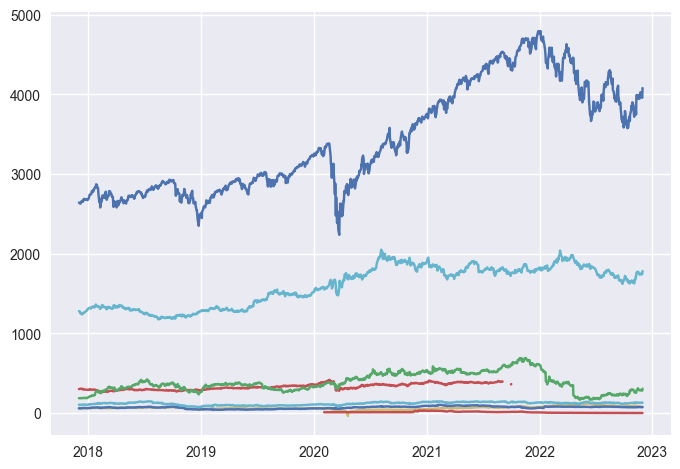

In [54]:
# to import OHLC data and save it as 'df_px_close' DataFrame
tickers = ['^GSPC', '^STOXX', '^SX6P', 'BTC-GBP', 'CL=F', 'GC=F', 'ATVI', 'NFLX', 'ARVL', 'ROO.L', 'EZJ.L', 'EA']
df_px_close = [] # deletes DataFrame in case it was created earlier
df_px_close = pd.DataFrame() # creates empty DataFrame to store closing stock price data
for ticker in tickers: # loops through each ticker to download its closing share price and add it under a newe column of the DataFrame
    df_px_close[ticker] = yf.Ticker(ticker).history(period='5y').Close
    # another way to do it is here: https://www.allthesnippets.com/notes/finance/calculating_cumulative_returns_of_stocks_with_python_and_pandas.html

# charts prices of all tickers on a single graph
plt.figure()
plt.plot(df_px_close)
plt.show()

In [56]:
# chart cumulative return of all tickers in a single chart. Full instructions here: https://www.allthesnippets.com/notes/finance/calculating_cumulative_returns_of_stocks_with_python_and_pandas.html

# Calculates daily & cumulative returns
df_daily_returns = df_px_close.pct_change() # computes daily returns for each security
df_daily_returns = df_daily_returns[1:] # deletes first row with NaN values
df_cum_daily_returns = (1 + df_daily_returns).cumprod() - 1 # calculates cumulative daily returns
df_cum_daily_returns = df_cum_daily_returns.reset_index() # to add row_index to the DataFrame

# Transforms cumulative returns data for charting
df_px_cum_return = df_cum_daily_returns.melt(id_vars=['Date'], value_vars=tickers, var_name='Ticker', value_name='Cumulative Return')
df_px_cum_return['Cumulative Return Percent'] = df_px_cum_return['Cumulative Return'] * 100

# Charts cumulative returns
fig = px.line(df_px_cum_return, x='Date',
              y='Cumulative Return Percent', color='Ticker',
              title='Performance - Daily Cumulative Returns',
              labels={'Cumulative Return Percent':'daily cumulative returns (%)', })
fig.show()

In [57]:
# calculates (cumulative?) return per security using formula: (last price - initial price) / initial price
cum_return = round(((df_px_close.iloc[-1] - df_px_close.iloc[0]) / df_px_close.iloc[0]) * 100)
cum_return

^GSPC      54.0
^STOXX      NaN
^SX6P       NaN
BTC-GBP     NaN
CL=F       38.0
GC=F       39.0
ATVI       23.0
NFLX       64.0
ARVL        NaN
ROO.L       NaN
EZJ.L       NaN
EA         25.0
dtype: float64

In [67]:
# imports OHLC data and save it as 'df_px_close' DataFrame
df_px_close = ticker.history(period='12y')

# adds a column with ticker name
df_px_close['Ticker'] = tickers
# df_px_close
df_px_close.columns

# chart data for the most recent 5000 datapoints
price_chart = alt.Chart(df_px_close.reset_index()).mark_line().encode(
    x='Date:T',
    y='Close',
    color='Ticker'
).interactive(bind_y=False)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Ticker'],
      dtype='object')

In [41]:
# Use this third-party template to loop through multiple tickers

def get_data(company_name):
    data = yf.download(company_name, period='7y')
    price = alt.Chart(data.reset_index()).mark_line().encode(
    x='Date:T',
    y='Close',
    tooltip=['Date', 'Open', 'High', 'Low', 'Volume']).properties(
    width=800, height=300)
    
    volume = alt.Chart(data.reset_index()).mark_line().encode(
    x='Date:T',
    y='Volume').properties(width=800, height=60)
       
    return price & volume

get_data('GOOGL')

[*********************100%***********************]  1 of 1 completed


alt.VConcatChart(...)